In [2]:
!git clone http://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [3]:
#Modificar o Makefile para habilitar a GPU e o OpenCV%cd darknet
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
#verificar CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [5]:
#construindo darknet
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

In [6]:
#Pegando os pesos pre-treinados do dataset coco para a yolov3
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-02-07 03:15:23--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  52.4MB/s    in 5.1s    

2024-02-07 03:15:28 (46.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [8]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/horses.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

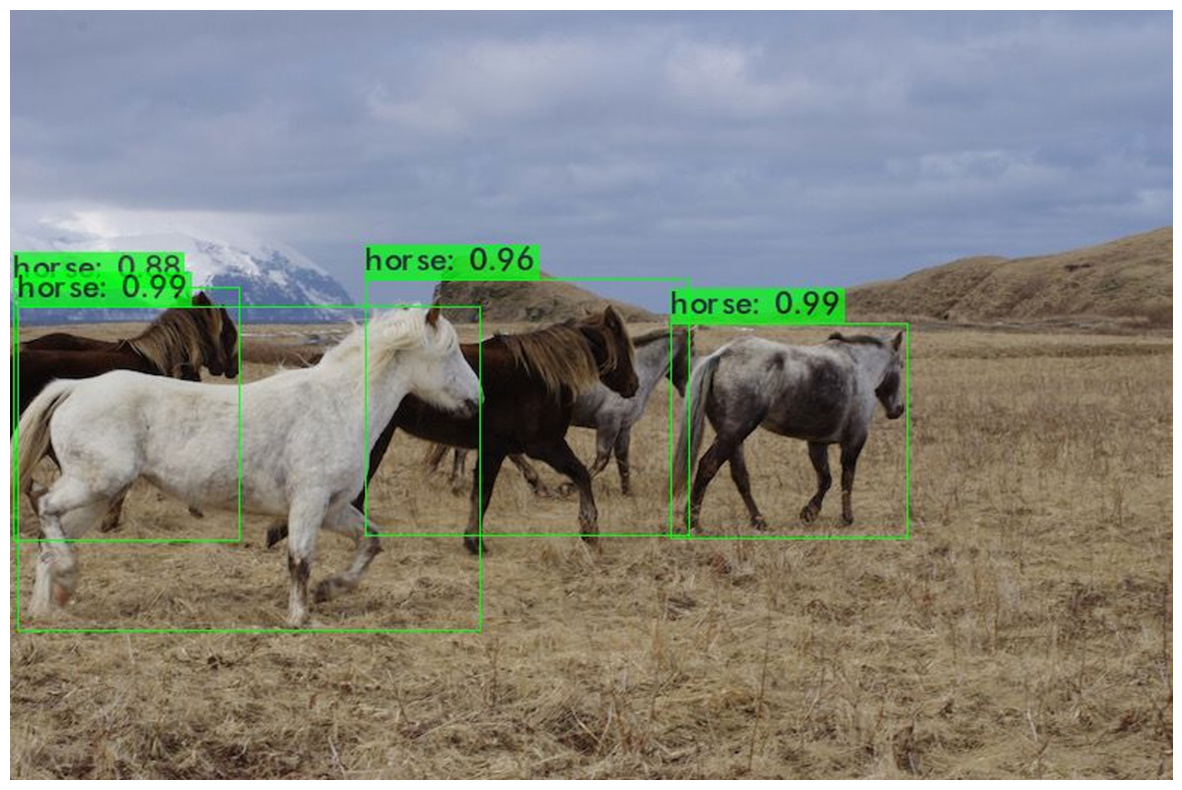

In [9]:
# show image using our helper function
imShow('predictions.jpg')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#!ls /mydrive/yolov3
!ls /content/drive/MyDrive/yolov3

obj.zip  yolobydelas.ipynb


In [19]:
#!cp /mydrive/yolov3/obj.zip ../
!cp /content/drive/MyDrive/yolov3/obj.zip ../

In [20]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/00062fd13de3786c.jpg  
  inflating: data/obj/00062fd13de3786c.txt  
  inflating: data/obj/000aa58056ae2b02.jpg  
  inflating: data/obj/000aa58056ae2b02.txt  
  inflating: data/obj/000f2708a72f9de2.jpg  
  inflating: data/obj/000f2708a72f9de2.txt  
  inflating: data/obj/0012ca60c774547e.jpg  
 extracting: data/obj/0012ca60c774547e.txt  
  inflating: data/obj/001a8a1a132eeed0.jpg  
 extracting: data/obj/001a8a1a132eeed0.txt  
  inflating: data/obj/001a98cdcee83e16.jpg  
 extracting: data/obj/001a98cdcee83e16.txt  
  inflating: data/obj/0030c1b9ffca4df4.jpg  
  inflating: data/obj/0030c1b9ffca4df4.txt  
  inflating: data/obj/003d55d31877d2dc.jpg  
  inflating: data/obj/003d55d31877d2dc.txt  
  inflating: data/obj/003f1f96e1ad2823.jpg  
 extracting: data/obj/003f1f96e1ad2823.txt  
  inflating: data/obj/0047a6314cd0f0ec.jpg  
 extracting: data/obj/0047a6314cd0f0ec.txt  
  inflating: data/obj/004d3afb906f211c.jpg  
 extracting: data/obj/004d3afb906f